In [9]:
import tensorflow as tf
x=tf.constant(5, dtype=tf.int32, name="xvar")
y=tf.constant(5, dtype=tf.int32)
z=tf.constant(5, dtype=tf.int32)
res=x*y+z
ss=tf.Session()
ss.run(res)

30

In [16]:
inputData=[1,2,3,4,5]
x=tf.placeholder(dtype=tf.float32)
y=x*2

In [17]:
sess=tf.Session()
sess.run(y,feed_dict={x:inputData})

array([ 2.,  4.,  6.,  8., 10.], dtype=float32)

In [43]:
x=tf.placeholder(dtype=tf.float32)
W=tf.Variable(2, dtype=tf.float32)
y=W*x
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)
sess.run(y, feed_dict={x:inputData})

array([ 2.,  4.,  6.,  8., 10.], dtype=float32)

In [52]:
xtrain=[1,2,3] #입력데이터
ytrain=[2,5,9] #결과
#0.06740659  3.3735623 -1.3792447  => 1000번
#0.055555567 3.4999826 -1.6666287  => 10000번, 100000번
W=tf.Variable(10, dtype=tf.float32) #초기값은 중요하지 않음
b=tf.Variable(5, dtype=tf.float32)
hf=W*xtrain+b #가설함수 => hf=10*xtrain+5 
cost=tf.reduce_mean(tf.square(hf-ytrain))

optimizer=tf.train.GradientDescentOptimizer(0.01)
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10000):
    sess.run(train)
#     if step==9999:
print(sess.run(cost), sess.run(W), sess.run(b))

0.055555567 3.4999826 -1.6666287


In [53]:
#최적값 0.055555567 3.4999826 -1.6666287  => 10000번, 100000번
x = 3.4999826 * 1 -1.6666287
print(x)

1.8333539


In [63]:
#xtrain=[1,2,3] #입력데이터
#ytrain=[2,5,9] #결과
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

W=tf.Variable(10, dtype=tf.float32) #초기값은 중요하지 않음
b=tf.Variable(5, dtype=tf.float32)
hf=W*x+b #가설함수 => hf=10*xtrain+5 
cost=tf.reduce_mean(tf.square(hf-y))

optimizer=tf.train.GradientDescentOptimizer(0.01)
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(1001):
    _,wv,bv,cv= sess.run([train,W,b,cost], feed_dict={x:[1,2,3], y:[2,5,9]})
#     if step%20==0:
#         print(step,wv,bv,cv)
print("x가 4,5,10일 때 예상되는 y값은?", sess.run(hf, feed_dict={x:[4,5,10]}))

x가 4,5,10일 때 예상되는 y값은? [12.11553  15.489396 32.358727]


In [64]:
tf.set_random_seed(7777) #동일한 난수가 발생되도록 시드 설정

In [69]:
#xtrain=[1,2,3] #입력데이터
#ytrain=[2,5,9] #결과
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

W=tf.Variable(tf.random_normal([1]), dtype=tf.float32) 
b=tf.Variable(tf.random_normal([1]), dtype=tf.float32) 
hf=x*W+b 
cost=tf.reduce_mean(tf.square(hf-y))

optimizer=tf.train.GradientDescentOptimizer(1e-3) #1*10의-3승 0.001
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(1001):
    _,wv,bv,cv= sess.run([train,W,b,cost], feed_dict={x:[1,2,3], y:[2,5,9]})
    if step%20==0:
        print(step,wv,bv,cv)
print("x가 4,5,10일 때 예상되는 y값은?", sess.run(hf, feed_dict={x:[4,5,10]}))

0 [-0.9020038] [1.1800269] 49.504807
20 [-0.3658327] [1.3929455] 32.513584
40 [0.06477396] [1.5595357] 21.630499
60 [0.41091737] [1.6890805] 14.657036
80 [0.6894793] [1.7890049] 10.186033
100 [0.9139656] [1.8652496] 7.316828
120 [1.0951817] [1.9225676] 5.472933
140 [1.2417723] [1.9647616] 4.2853675
160 [1.3606535] [1.9948729] 3.5179605
180 [1.4573587] [2.0153356] 3.0195484
200 [1.5363146] [2.0280955] 2.6933784
220 [1.6010629] [2.034711] 2.4775212
240 [1.6544366] [2.0364277] 2.33234
260 [1.6987035] [2.0342429] 2.23246
280 [1.735676] [2.028953] 2.1616445
300 [1.7668061] [2.0211966] 2.1094964
320 [1.7932541] [2.0114834] 2.0693629
340 [1.8159493] [2.0002217] 2.0369833
360 [1.8356342] [1.9877379] 2.009631
380 [1.8529043] [1.9742928] 1.9855595
400 [1.8682343] [1.9600955] 1.9636508
420 [1.8820051] [1.9453129] 1.9431896
440 [1.8945216] [1.9300781] 1.9237152
460 [1.9060271] [1.9144986] 1.9049345
480 [1.9167167] [1.898659] 1.8866583
500 [1.9267464] [1.8826275] 1.8687639
520 [1.9362411] [1.866458

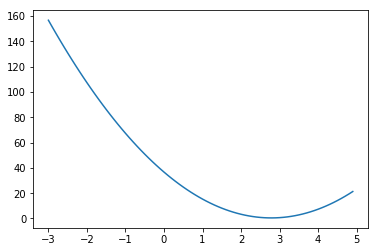

In [77]:
import matplotlib.pyplot as plt

xtrain=[1,2,3] 
ytrain=[2,5,9] 
W=tf.placeholder(dtype=tf.float32)
hf=xtrain*W
cost=tf.reduce_mean(tf.square(hf-ytrain))

sess=tf.Session()
sess.run(tf.global_variables_initializer())


W_val=[]
cost_val=[]

for step in range(-30,50):
    feed_W=step*0.1 #-3, -2.9, -2.8, ... 4.9
    cv, wv=sess.run([cost,W], feed_dict={W:feed_W})
    W_val.append(wv)
    cost_val.append(cv)
plt.plot(W_val, cost_val)
plt.show()
 

##### 1. cars.csv를 읽어서 리스트에 저장
##### 2. 리스트의 1번째 열 -> xdata리스트에 저장
##### 3. 리스트의 1번쨰 열 -> ydata리스트에 저장
##### 4. 선형 회귀 모델 생성
##### 5. cost 출력
##### 6. 속도가 20 30 40 50 70 일때, 예상되는 제동거리 출력

In [132]:
import pandas as pd
car = pd.read_csv("cars.csv", skiprows=1, names=['speed', 'dist'])

In [133]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
speed    50 non-null int64
dist     50 non-null int64
dtypes: int64(2)
memory usage: 880.0 bytes


In [134]:
xdata=car['speed']
xdata=car['dist']

In [140]:
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

W=tf.Variable(tf.random_normal([1]), dtype=tf.float32) 
b=tf.Variable(tf.random_normal([1]), dtype=tf.float32) 

hf=x*W+b 

cost=tf.reduce_mean(tf.square(hf-y))

optimizer=tf.train.GradientDescentOptimizer(0.0001) 
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(1001):
    _,wv,bv,cv= sess.run([train,W,b,cost], feed_dict={x:xdata, y:ydata})
    if step%20==0:
        print(step,wv,bv,cv)

for t in test
    

0 [0.28071785] [-1.6038601] 5569.28
20 [1.0273476] [-1.5893556] 0.6581404
40 [1.0273198] [-1.5877008] 0.656771
60 [1.0272913] [-1.5860478] 0.6554053
80 [1.0272629] [-1.5843961] 0.6540389
100 [1.0272346] [-1.5827463] 0.65267676
120 [1.0272062] [-1.5810986] 0.6513183
140 [1.0271778] [-1.5794523] 0.64996314
160 [1.0271496] [-1.5778074] 0.64861137
180 [1.0271213] [-1.5761647] 0.6472614
200 [1.027093] [-1.5745237] 0.6459139
220 [1.0270648] [-1.5728841] 0.6445694
240 [1.0270367] [-1.5712461] 0.64322686
260 [1.0270085] [-1.5696104] 0.64188856
280 [1.0269803] [-1.567976] 0.64055467
300 [1.0269523] [-1.5663431] 0.6392205
320 [1.0269243] [-1.5647123] 0.6378878
340 [1.0268961] [-1.5630832] 0.6365612
360 [1.0268682] [-1.5614555] 0.63523585
380 [1.0268402] [-1.5598295] 0.63391244
400 [1.0268123] [-1.5582056] 0.6325949
420 [1.0267843] [-1.5565832] 0.6312783
440 [1.0267564] [-1.5549622] 0.62996244
460 [1.0267285] [-1.5533433] 0.62865484
480 [1.0267007] [-1.551726] 0.6273461
500 [1.026673] [-1.5501101

In [175]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [176]:
xy=pd.read_csv('score.csv', header=None) #dataframe
xy=np.loadtxt('score.csv', delimiter=',') #array

In [180]:
# xy[행,열]
# xy[:,:] #모든 행렬을 추출해라
# xy[:,0] #0번 인덱스 열 추출
# xy[:,1] #1번 인덱스 열 추출
# print(xy)
# print("="*50)
# print(xy[:,0:3])#0~2번열까지 추출
# print(xy[:,:-1])#0번열~마지막열 앞까지 추출

xdata=xy[:,:-1]

In [181]:
# xy[:,3:4] #출력 matrix
# xy[:,-1] #출력 array
# print(xy[:,[-1]]) #출력 matrix
ydata=xy[:,[-1]]

In [184]:
print(xdata.shape) #(25, 3)
print(ydata.shape) #(25, 1)

x=tf.placeholder(tf.float32, shape=[None,3]) #None은 정해지지 않았음
y=tf.placeholder(tf.float32, shape=[None,1])
w=tf.Variable(tf.random_normal([3,1]))
b=tf.Variable(tf.random_normal([1]))

# 매트릭스 형태
# hf=x*w+b 이렇게 하면 안됨
#  xdata*w+b
#(25,3)*(3,1)+b

hf=tf.matmul(x, w)+b
cost=tf.reduce_mean(tf.square(hf-y))

sess=tf.Session()
sess.run(tf.global_variables_initializer())

optimizer=tf.train.GradientDescentOptimizer(1e-5)
train=optimizer.minimize(cost)

for step in range(3001):
    cv,wv,bv,_=sess.run([cost, w, b, train], feed_dict={x:xdata, y:ydata})
    if step%20==0:
        print("step=",step, "cost=", cv, "w=", wv, "b=",bv)



(25, 3)
(25, 1)
step= 0 cost= 88395.13 w= [[-1.0207365 ]
 [ 0.76292586]
 [ 0.04149717]] b= [0.28069067]
step= 20 cost= 32.332954 w= [[-0.28195596]
 [ 1.4936713 ]
 [ 0.8014589 ]] b= [0.28976855]
step= 40 cost= 31.986727 w= [[-0.27944008]
 [ 1.4869531 ]
 [ 0.80566555]] b= [0.2897538]
step= 60 cost= 31.646112 w= [[-0.2769674]
 [ 1.480252 ]
 [ 0.8097966]] b= [0.2897383]
step= 80 cost= 31.310755 w= [[-0.27450392]
 [ 1.4736016 ]
 [ 0.81388706]] b= [0.2897227]
step= 100 cost= 30.98058 w= [[-0.27204946]
 [ 1.467001  ]
 [ 0.81793755]] b= [0.28970662]
step= 120 cost= 30.655481 w= [[-0.2696041 ]
 [ 1.4604503 ]
 [ 0.82194823]] b= [0.28969052]
step= 140 cost= 30.33542 w= [[-0.2671676]
 [ 1.4539489]
 [ 0.8259197]] b= [0.28967386]
step= 160 cost= 30.020254 w= [[-0.26474017]
 [ 1.447496  ]
 [ 0.82985216]] b= [0.28965718]
step= 180 cost= 29.709951 w= [[-0.2623216 ]
 [ 1.4410919 ]
 [ 0.83374614]] b= [0.28964007]
step= 200 cost= 29.404411 w= [[-0.25991222]
 [ 1.4347364 ]
 [ 0.83760154]] b= [0.28962278]
s

step= 2080 cost= 14.228168 w= [[-0.07049298]
 [ 1.0068339 ]
 [ 1.0706873 ]] b= [0.28711504]
step= 2100 cost= 14.154227 w= [[-0.06883878]
 [ 1.0036868 ]
 [ 1.0721475 ]] b= [0.28708166]
step= 2120 cost= 14.081402 w= [[-0.06719133]
 [ 1.0005624 ]
 [ 1.073592  ]] b= [0.2870481]
step= 2140 cost= 14.009573 w= [[-0.06555066]
 [ 0.9974604 ]
 [ 1.0750211 ]] b= [0.28701413]
step= 2160 cost= 13.93875 w= [[-0.0639169 ]
 [ 0.99438095]
 [ 1.0764352 ]] b= [0.28698015]
step= 2180 cost= 13.868954 w= [[-0.06228991]
 [ 0.9913236 ]
 [ 1.0778342 ]] b= [0.28694618]
step= 2200 cost= 13.80015 w= [[-0.06066972]
 [ 0.9882883 ]
 [ 1.0792185 ]] b= [0.2869122]
step= 2220 cost= 13.732312 w= [[-0.05905627]
 [ 0.98527473]
 [ 1.0805879 ]] b= [0.28687823]
step= 2240 cost= 13.665426 w= [[-0.05744958]
 [ 0.982283  ]
 [ 1.0819427 ]] b= [0.2868441]
step= 2260 cost= 13.599491 w= [[-0.05584964]
 [ 0.9793127 ]
 [ 1.0832831 ]] b= [0.28680953]
step= 2280 cost= 13.534477 w= [[-0.05425629]
 [ 0.9763638 ]
 [ 1.0846092 ]] b= [0.286

In [185]:
print("90 90 90 => 예상 점수=", sess.run(hf, feed_dict={x:[[90,90,90]]}))
print("40 50 55 => 예상 점수=", sess.run(hf, feed_dict={x:[[40,50,55]]}))
print("70 90 60 => 예상 점수=", sess.run(hf, feed_dict={x:[[70,90,60]]}))

90 90 90 => 예상 점수= [[180.81236]]
40 50 55 => 예상 점수= [[106.20919]]
70 90 60 => 예상 점수= [[147.11925]]
